C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Best n_components: 2, Silhouette Score: 0.917


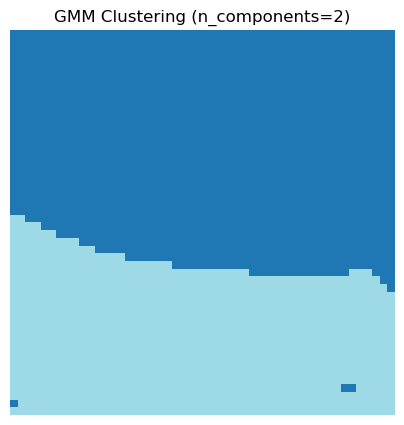

In [2]:
 import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

with rasterio.open('GRAY_HR_SR_OB.tif') as src:
    image_arr = src.read()

sub_image = image_arr[0][3120:3170, 13750:13800]
X = sub_image.reshape(-1, 1)

best_score = -1
best_k = 2
best_labels = None

for k in range(2, 7):
    gmm = GaussianMixture(n_components=k, random_state=0)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f'Best n_components: {best_k}, Silhouette Score: {best_score:.3f}')

clustered_img = best_labels.reshape(sub_image.shape)
plt.figure(figsize=(5,5))
plt.title(f'GMM Clustering (n_components={best_k})')
plt.imshow(clustered_img, cmap='tab20')
plt.axis('off')
plt.show()